In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
plt.style.use("fivethirtyeight")
from scipy.stats import skew,zscore
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [50]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4746,0637-KVDLV,Male,0,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.50,162.45,Yes
7014,9053-EJUNL,Male,0,No,No,41,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,3645.75,No
4587,5201-USSQZ,Female,0,Yes,No,26,Yes,No,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,No,Credit card (automatic),85.90,2196.45,No
973,8919-FYFQZ,Male,1,Yes,No,44,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,30.35,1359.7,Yes
738,1307-TVUFB,Male,1,No,No,42,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.35,3344.1,No
2476,9135-MGVPY,Male,0,Yes,No,69,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,84.70,5878.9,No
6753,4114-QMKVN,Female,0,Yes,Yes,56,Yes,Yes,DSL,Yes,...,No,No,No,Yes,One year,No,Bank transfer (automatic),68.75,3815.4,No
5063,3744-ZRRDZ,Male,0,No,No,21,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,82.35,1852.85,Yes
6548,5012-YSPJJ,Male,0,Yes,Yes,31,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Mailed check,54.35,1647,No
2753,6857-VWJDT,Female,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,95.65,95.65,Yes


In [51]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [53]:
df.drop(columns = ['customerID'], inplace=True)

In [59]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(6531,), dtype=object)

In [61]:
# Replace spaces with NaN (optional if present)
df["TotalCharges"] = df["TotalCharges"].replace(" ", pd.NA)

# Convert the column to numeric (this will handle decimal numbers correctly)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [64]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [67]:
# Fill missing values in TotalCharges using median
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [68]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [69]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numeric Columns:")
print(num_cols)

print("\nCategorical Columns:")
print(cat_cols)

Numeric Columns:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Categorical Columns:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


# unique valuse for numerical column

In [71]:
for col in num_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())
    print("-----------------------------------")


Unique values in 'SeniorCitizen':
[0 1]
-----------------------------------

Unique values in 'tenure':
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
-----------------------------------

Unique values in 'MonthlyCharges':
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
-----------------------------------

Unique values in 'TotalCharges':
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
-----------------------------------


In [72]:
# Remove SeniorCitizen only from the numeric columns list
num_cols = num_cols.drop("SeniorCitizen")

print(num_cols)


Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


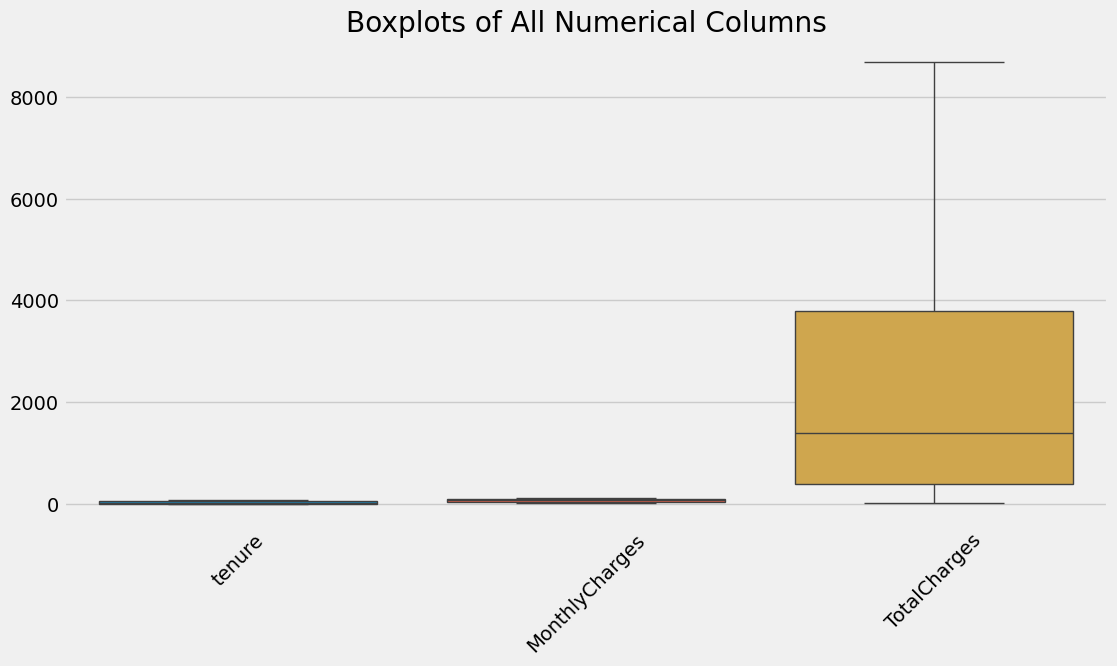

In [74]:
# Set figure size dynamically based on number of columns
plt.figure(figsize=(len(num_cols)*4, 6))

sns.boxplot(data=df[num_cols])
plt.title("Boxplots of All Numerical Columns")
plt.xticks(rotation=45) 
plt.show()

In [75]:
for col in num_cols:
    skwemess = df["tenure"].skew()
    print(f" {col} has {skwemess} skwemess ")

 tenure has 0.2395397495619829 skwemess 
 MonthlyCharges has 0.2395397495619829 skwemess 
 TotalCharges has 0.2395397495619829 skwemess 


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [77]:
# categorical column

In [78]:
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [79]:
for col in cat_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())
    print("-----------------------------------------------")


Unique values in 'gender':
['Female' 'Male']
-----------------------------------------------

Unique values in 'Partner':
['Yes' 'No']
-----------------------------------------------

Unique values in 'Dependents':
['No' 'Yes']
-----------------------------------------------

Unique values in 'PhoneService':
['No' 'Yes']
-----------------------------------------------

Unique values in 'MultipleLines':
['No phone service' 'No' 'Yes']
-----------------------------------------------

Unique values in 'InternetService':
['DSL' 'Fiber optic' 'No']
-----------------------------------------------

Unique values in 'OnlineSecurity':
['No' 'Yes' 'No internet service']
-----------------------------------------------

Unique values in 'OnlineBackup':
['Yes' 'No' 'No internet service']
-----------------------------------------------

Unique values in 'DeviceProtection':
['No' 'Yes' 'No internet service']
-----------------------------------------------

Unique values in 'TechSupport':
['No' 'Yes'

### Replace special "No internet service" & "No phone service"

In [93]:
# Step 1: Replace special "No internet service" & "No phone service"
cols_replace_no_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_replace_no_internet:
    df[col] = df[col].replace('No internet service', 'No')

df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')


### Label Encode binary columns

In [96]:
# Label Encode binary columns
le = LabelEncoder()

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'MultipleLines', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])


### One-Hot Encode multi-category columns

In [98]:
# One-Hot Encode multi-category columns
multi_cols = ['InternetService', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=multi_cols, drop_first=True)


### Label Encode remaining object columns

In [100]:
# Label Encode remaining object columns
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    df[col] = le.fit_transform(df[col])


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

In [102]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,False,False,True,False,False,False,True
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,True,False,True,False,True,False,False
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,False,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,True,False,False,False,False,False,True


In [104]:
# Convert all bool columns to int (0/1)
bool_cols = df.select_dtypes(include='bool').columns

df[bool_cols] = df[bool_cols].astype(int)


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

# correlation and heatmap 

In [109]:
corr = df.corr()
corr.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.0,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.017021,-0.013773,-0.002105,...,-0.014569,-0.000002,-0.008612,-0.011286,0.006026,0.008026,-0.003695,0.001215,0.000752,0.013744


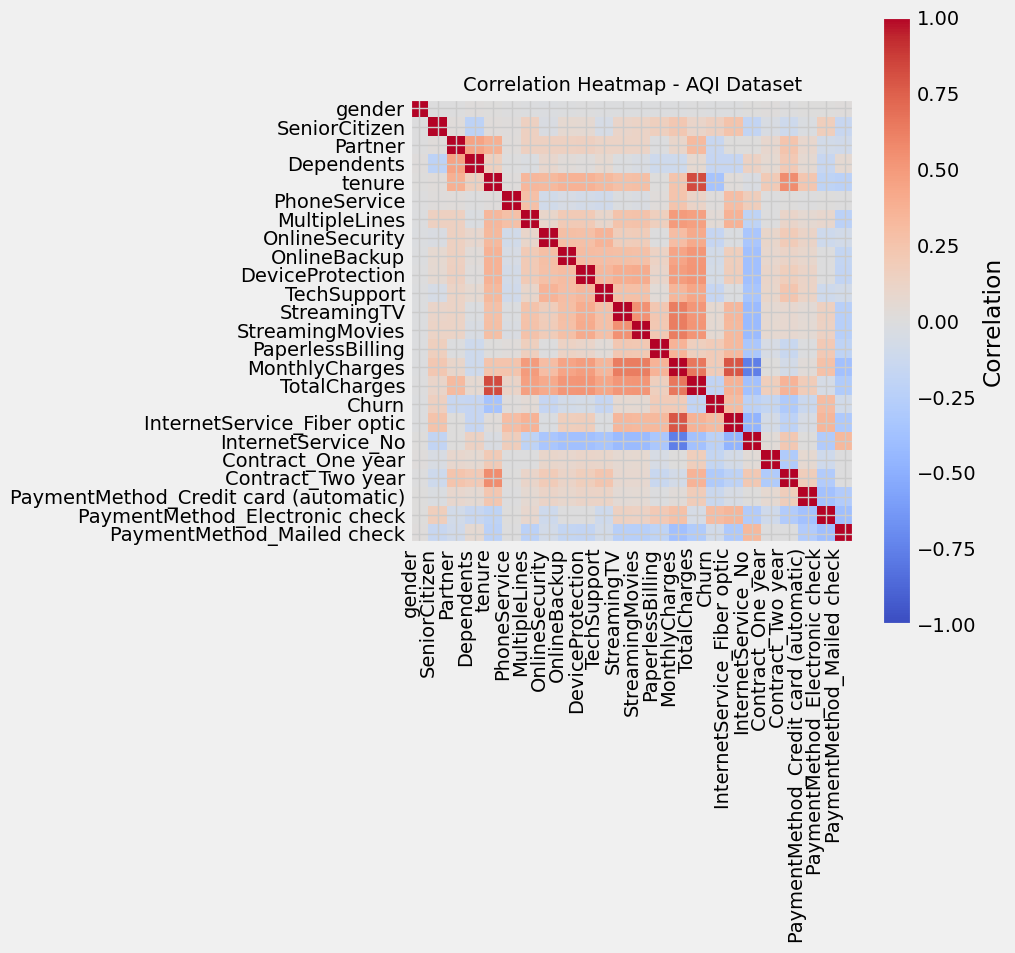

In [110]:
# Plot correlation heatmap
plt.figure(figsize=(10,10))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap - AQI Dataset", fontsize=14)
plt.tight_layout()
plt.show()

# Define target and features

In [113]:
X = df.drop("Churn", axis=1)  
y = df["Churn"]                


# spliting data

In [117]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [118]:
# SMOTE

In [120]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Before SMOTE class distribution
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE only on training data
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# After SMOTE
print("After SMOTE:", Counter(y_train_sm))


Before SMOTE: Counter({0: 4139, 1: 1495})
After SMOTE: Counter({0: 4139, 1: 4139})


# Model Selection

In [122]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Updated model evaluation after SMOTE
print("\n===== Model Evaluation After SMOTE =====\n")

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_sm, y_train_sm)
    y_pred_sm = model.predict(X_test)
    y_train_pred=model.predict(X_train)

    print("Train Accuracy:", round(accuracy_score(y_train,y_train_pred),4))
    print("Test Accuracy:", round(accuracy_score(y_test, y_pred_sm), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sm))
    print("\nClassification Report:\n", classification_report(y_test, y_pred_sm))
    print("-" * 60)



===== Model Evaluation After SMOTE =====


===== Logistic Regression =====
Train Accuracy: 0.7739
Test Accuracy: 0.7764
Confusion Matrix:
 [[843 192]
 [123 251]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1035
           1       0.57      0.67      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409

------------------------------------------------------------

===== Decision Tree =====
Train Accuracy: 0.9977
Test Accuracy: 0.7048
Confusion Matrix:
 [[797 238]
 [178 196]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79      1035
           1       0.45      0.52      0.49       374

    accuracy                           0.70      1409
   macro avg       0.63      0.65      0.64      1409
weighted avg 

In [124]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=2000),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_lr.fit(X_train_sm, y_train_sm)

print("\nBest Hyperparameters:", grid_lr.best_params_)
best_lr = grid_lr.best_estimator_


Fitting 5 folds for each of 80 candidates, totalling 400 fits

Best Hyperparameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}


In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_train_pred = best_lr.predict(X_train_sm)
y_test_pred = best_lr.predict(X_test)

print("\n===== Logistic Regression (After Tuning) =====")
print("Train Accuracy:", round(accuracy_score(y_train_sm, y_train_pred), 4))
print("Test Accuracy:", round(accuracy_score(y_test, y_test_pred), 4))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:\n", classification_report(y_test, y_test_pred))



===== Logistic Regression (After Tuning) =====
Train Accuracy: 0.8264
Test Accuracy: 0.7743

Confusion Matrix:
 [[834 201]
 [117 257]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1035
           1       0.56      0.69      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409



In [131]:
from joblib import dump

# Save the BEST tuned model from GridSearchCV
dump(grid_lr.best_estimator_, "logistic_regression_model.joblib")

print("✅ Model saved successfully as logistic_regression_model.joblib")


✅ Model saved successfully as logistic_regression_model.joblib


In [132]:
from joblib import load

# Load model
loaded_model = load("logistic_regression_model.joblib")

# Try prediction
sample_pred = loaded_model.predict(X_test[:5])
print(sample_pred)


[0 1 0 0 0]
